In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [2]:
experiment = "MOS2_quartz_2L"
ref_file = 'data/GGHO_2023.06.21_THZ1_01'  # 0101 to 0105 .txt
sample_file = 'data/GGHO_2023.06.22_THZ1_00'  # 0016 to 0020 .txt
start_ref = 1
stop_ref = 5
start_sample = 16
stop_sample = 20
assert stop_ref - start_ref == stop_sample - start_sample

In [3]:
def plot_my_freq_array(freqs, complex_array, half=False):
    N = len(freqs)
    if half:
        last = N//2
    else:
        last = N
    plt.plot(freqs[0:last], np.real(complex_array)[0:last], 'xr', label='real')
    plt.plot(freqs[0:last], -1.0 * np.imag(complex_array)[0:last], 'xb', label='imag')
    # plt.plot(freqs[0:last], np.abs(complex_array)[0:last], 'xg', label='abs')
    plt.legend()
    plt.grid()
    # plt.show()
    plt.savefig(experiment+'_fft_average.png')

In [4]:
index_ref = start_ref
index_sample = start_sample

ref_file_index = ref_file + str(index_ref).zfill(2) + '.txt'
# print(ref_file_index)
ref = np.loadtxt(fname=ref_file_index, delimiter=' ')

sample_file_index = sample_file + str(index_sample).zfill(2) + '.txt'
# print(sample_file_index)
sample = np.loadtxt(fname=sample_file_index, delimiter=' ')

index_ref +=1
index_sample +=1

while index_ref <= stop_ref:
    ref_file_index = ref_file + str(index_ref).zfill(2) + '.txt'
    # print(ref_file_index)
    ref += np.loadtxt(fname=ref_file_index, delimiter=' ')

    sample_file_index = sample_file + str(index_sample).zfill(2) + '.txt'
    # print(sample_file_index)
    sample += np.loadtxt(fname=sample_file_index, delimiter=' ')
    
    index_ref +=1
    index_sample +=1

In [5]:
ref = ref / (1 + stop_ref - start_ref)
sample = sample / (1 + stop_sample - start_sample)

Text(0.5, 1.0, 'averaged ref data, columns 1 and 2, against column 0')

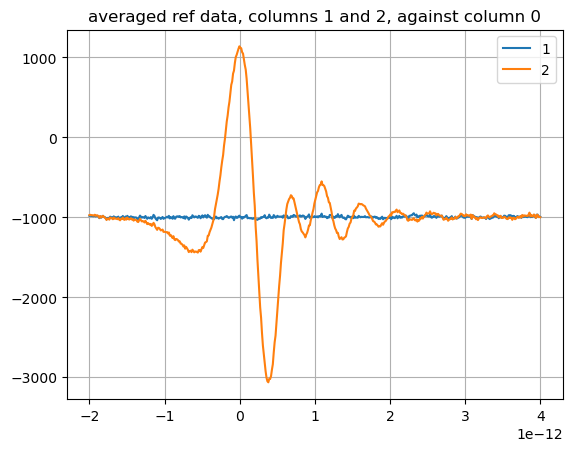

In [6]:
# plt.ylim((-500, 3500))
for col in range(1, ref.shape[1]):
    plt.plot(ref[:, 0], ref[:, col], label=str(col))
plt.legend()
plt.grid()
plt.title('averaged ref data, columns 1 and 2, against column 0')

Text(0.5, 1.0, 'averaged ref data, columns 2 - 1, against column 0')

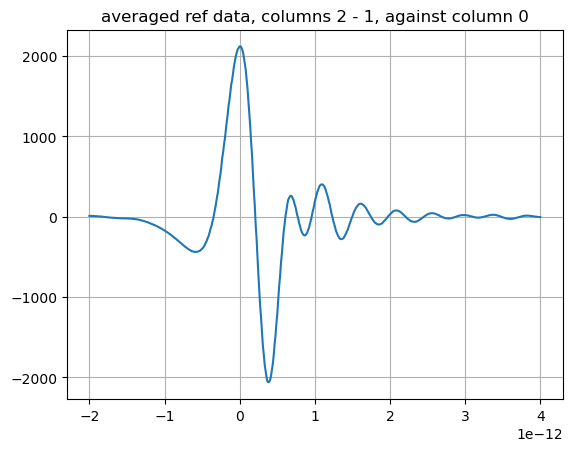

In [7]:
plt.plot(ref[:, 0], ref[:, 2] - ref[:, 1])
plt.grid()
plt.title('averaged ref data, columns 2 - 1, against column 0')

Text(0.5, 1.0, 'averaged sample data, columns 1 and 2, against column 0')

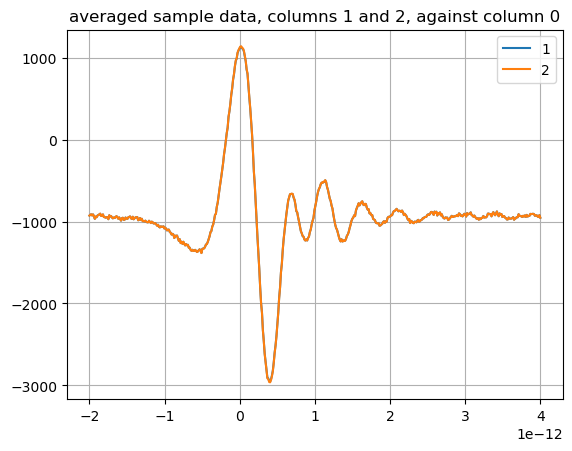

In [8]:
# plt.ylim((-500, 3500))
for col in range(1, sample.shape[1]):
    plt.plot(sample[:, 0], sample[:, col], label=str(col))
plt.legend()
plt.grid()
plt.title('averaged sample data, columns 1 and 2, against column 0')

Text(0.5, 1.0, 'averaged sample data, columns 2 - 1, against column 0')

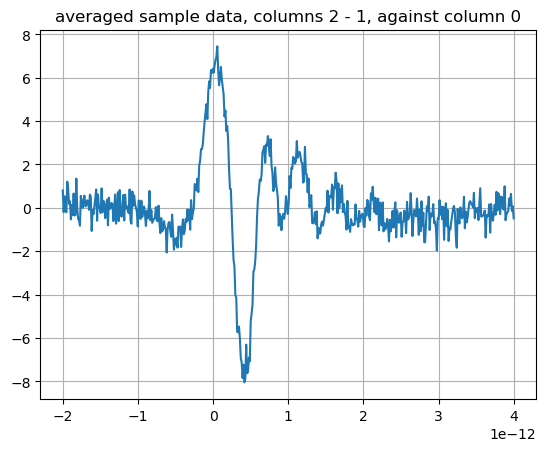

In [9]:
plt.plot(sample[:, 0], sample[:, 2] - sample[:, 1])
plt.grid()
plt.title('averaged sample data, columns 2 - 1, against column 0')

In [10]:
# Find the frequencies
T = ref[1, 0] - ref[0, 0]
N = len(ref)
xf = fftfreq(N, T)

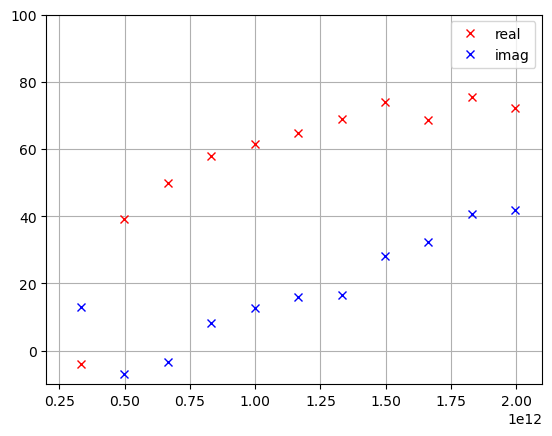

In [11]:
delta_E_trts = fft(sample[:, 1] - sample[:, 2])
E_tds = fft(ref[:, 2] - ref[:, 1])
result = 0.007965 * -1. * delta_E_trts / (delta_E_trts + E_tds) / 4.3e-7
plt.xlim((0.2e12, 2.1e12))
plt.ylim((-10, 100))
# plt.ylim((-.00005, .00005))
plot_my_freq_array(xf, result, half=True)

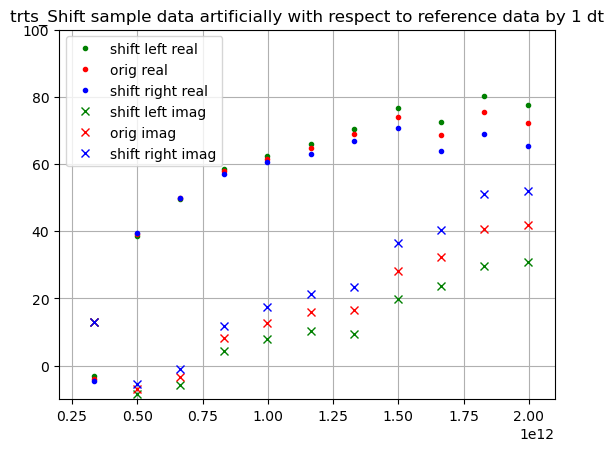

In [12]:
shifts = 1
sample_shift_right = sample.copy()
sample_shift_right[shifts:] = sample[:-shifts]
for i in range(shifts):
    sample_shift_right[i][1:3] = 0.
for i in range(len(sample_shift_right)):
    sample_shift_right[i][0] = sample[i][0]

sample_shift_left = sample.copy()
sample_shift_left[:-shifts] = sample[shifts:]
for i in range(shifts):
    sample_shift_left[-i-1][1:3] = 0.
for i in range(len(sample_shift_left)):
    sample_shift_left[i][0] = sample[i][0]

result = 0.007965 * -1. * fft(sample[:, 1] - sample[:, 2]) / (fft(sample[:, 1] - sample[:, 2]) + fft(ref[:, 2] - ref[:, 1])) / 4.3e-7
result_shift_right = 0.007965 * -1. * fft(sample_shift_right[:, 1] - sample_shift_right[:, 2]) / (fft(sample_shift_right[:, 1] - sample_shift_right[:, 2]) + fft(ref[:, 2] - ref[:, 1])) / 4.3e-7
result_shift_left = 0.007965 * -1. * fft(sample_shift_left[:, 1] - sample_shift_left[:, 2]) / (fft(sample_shift_left[:, 1] - sample_shift_left[:, 2]) + fft(ref[:, 2] - ref[:, 1])) / 4.3e-7
last = len(xf)//2
plt.plot(xf[0:last], np.real(result_shift_left)[0:last], '.g', label='shift left real')
plt.plot(xf[0:last], np.real(result)[0:last], '.r', label='orig real')
plt.plot(xf[0:last], np.real(result_shift_right)[0:last], '.b', label='shift right real')
plt.plot(xf[0:last], -1.0 * np.imag(result_shift_left)[0:last], 'xg', label='shift left imag')
plt.plot(xf[0:last], -1.0 * np.imag(result)[0:last], 'xr', label='orig imag')
plt.plot(xf[0:last], -1.0 * np.imag(result_shift_right)[0:last], 'xb', label='shift right imag')
plt.legend()
plt.grid()
plt.xlim((0.2e12, 2.1e12))
plt.ylim((-10, 100))
plt.title('trts_Shift sample data artificially with respect to reference data by 1 dt')
plt.savefig('trts_shift_sample_fft_average.png')